# Intro to Geospatial Data using Python

## Disclaimer
* Not a GIS expert, just someone with the drive to self learn.
* Going to be talking mostly about Shape (.shp) files but other formats exist (geojson, raster, etc)
* Using Python 3.5, no guarantees everything works on 2.7

## Background
* What is GeoSpatial Data?
* Types of GeoSpatial Data
* What kinds of GeoSpatial Data is available?
* Where to get data?

## Technical
* Getting Set Up
* Reading in Data
* Exploring Data
    * Fields
    * Profiling
    * Visualization
* Filtering
    * Data Attributes
    * Geodesic Features
* Geodesic transformations
    * Units of Measure
    * Projections
* Geodesic Calculations
    * Centroid
    * Area
    * Perimeter
    * Distance between points
* Joins/merges
    * Joining tabular data
    * Joining on geodesic features
* Creating new data
    * New Fields
    * New Shapes
* Writing Data

## What is GeoSpatial Data?
The word geospatial is used to indicate that data that has a geographic component to it.  This means that the records in a dataset have locational information tied to them such as geographic data in the form of coordinates, address, city, or ZIP code. GIS data is a form of geospatial data.  Other geospatial data can originate from GPS data, satellite imagery, and geotagging. [1]

![](./img/gislayers.jpg)

[1]: https://www.gislounge.com/difference-gis-geospatial/

## Types of Geospatial Data

## Vector/Polygon Data
* A representation of the world using points, lines, and polygons. 
* Vector models are useful for storing data that has discrete boundaries, such as country borders, land parcels, and streets.
* Common formats are Shape Files, GeoJSON, KML (Keyhole Markup Language)
![](./img/GIS_Shape.jpg)

## Raster Data
* Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps
* Common formats are .JPG, .TIF, .GIF or similar format
![](./img/GIS_Raster.jpg)

## Tablular Files
* Numeric data is statistical data which includes a geographical component 
* Joined with vector files so the data can be queried and displayed as a layer on a map in a GIS. 
* The most common type of numeric data is demographic data from the US Census.
* Unique Identifiers (Hydrology Number, State, Metropolitan Statistical Area ID, Lat/Long, etc)
![](./img/GIS_tabular.jpg)

## What kinds of GeoSpatial Data is available?
![](./img/GIS_Categories.PNG)
### Government
* Local (MetCouncil, Minneapolis School District)
* State (DNR, MN PCA, Hennepin County)
* Federal (Census Bureau, NASA)

### Private
* Xcel Engery, Centerpoint, Google

## Where can I get Minnesota Geospatial Data?
[![MN GeoSpatial Commons](./img/mn_geospatial.PNG)](https://gisdata.mn.gov/)

# Getting Set Up

## Start with Anaconda 3.5
Anaconda is the de facto industry standard for Python Scientific Computing. Without it users are left to manage dependencies, find and compile low level C libraries and generally in for a huge headache. Added bonus is that you don't need administrator privledges to install if you install only for the local user.

### Download Here
[![Download Here](./img/Anaconda_Download.PNG)](https://www.continuum.io/downloads)

![conda-forge](./img/Conda_Forge.PNG)

## Install Additional Libraries

Conda is a packaging tool and installer that aims to do more than what pip does; handle library dependencies outside of the Python packages as well as the Python packages themselves.

## What is Conda Forge?

conda-forge is a github organization containing repositories of conda recipes. Each repository automatically builds its own recipe in a clean and repeatable way on Windows, Linux and OSX. 

Extremely valuable as you don't have to find and compile dependencies (which isn't fun on Linux/OSX and is a *NIGHTMARE* on Windows).

**Enable conda-forge repositories by running the cell below:**

In [1]:
!conda config --add channels conda-forge

**Create an environment so the following installs don't break any other dependencies**

In [2]:
!conda create --name sds_geo python -y



CondaValueError: Value error: prefix already exists: D:\Anaconda3\envs\sds_geo




## Switch to the `sds_geo` Environment

**If Windows run the following cell**

In [3]:
!activate sds_geo

**If OSX or Linux run the following cell**

In [ ]:
!source activate sds_geo

'source' is not recognized as an internal or external command,
operable program or batch file.


## Python Geospatial Libraries Covered in Notebook

* [geopandas][] - Working with spatial data is fun again!
* [shapely][] - For geometry handling
* [rtree][] - For efficiently querying spatial data
* [pyshp][] - For reading and writing shapefiles (in _pure_ Python)
* [pyproj][] - For conversions between projections
* [fiona][] - For making it _easy_ to read/write geospatial data formats
* [ogr/gdal][] - For reading, writing, and transforming geospatial data formats
* [geopy][] - For geolocating and things like that
* [pysal][] -  Spatial econometrics, exploratory spatial and spatio-temporal data analysis, spatial clustering (and more)
* [descartes][] - For plotting geometries in matplotlib

[pandas]: http://pandas.pydata.org/
[geopandas]: https://github.com/kjordahl/geopandas
[shapely]: https://pypi.python.org/pypi/Shapely
[rtree]: http://toblerity.github.io/rtree/
[geopy]: https://code.google.com/p/geopy/
[ogr/gdal]: https://pypi.python.org/pypi/GDAL/
[fiona]: http://toblerity.github.io/fiona/
[pysal]: http://pysal.org
[pyproj]: https://code.google.com/p/pyproj/
[pyshp]: https://code.google.com/p/pyshp/
[descartes]: https://pypi.python.org/pypi/descartes

### [Exhaustive List Here](https://github.com/SpatialPython/spatial_python/blob/master/packages.md)

**Install packages by running the cell below**

In [ ]:
!conda install -n sds_geo geopandas -y
!conda install -n sds_geo rtree -y
!conda install -n sds_geo pyshp -y
!conda install -n sds_geo pyproj -y
!conda install -n sds_geo geojson -y

## Install Additional GitHub Packages
Conda should be your go-to installer but some of the really specific libraries you need to install with Pip

* [pandas-profiling][] - Generates profile reports from a pandas DataFrame
* [geoplotlib][] - For visualizing geographical data and making maps
* [missingno][] - Provides a small toolset of flexible and easy-to-use missing data visualizations 

[pandas-profiling]: https://github.com/JosPolfliet/pandas-profiling
[geoplotlib]: https://github.com/andrea-cuttone/geoplotlib
[missingno]: https://github.com/ResidentMario/missingno



**Install packages by running the cell below**

In [ ]:
!pip install https://github.com/JosPolfliet/pandas-profiling/archive/master.zip
!pip install https://github.com/andrea-cuttone/geoplotlib/archive/master.zip
!pip install https://github.com/ResidentMario/missingno/archive/master.zip

# Data Set
## MetroGIS Tax Parcels 2015
![](./img/preview.jpg)

## Download the File
**Warning this file is 576MB compressed and 6.30GB uncompressed**
* After unzipping only the files that start with `Parcels2015All7Points` and the `metadata/` directory are needed.
    * This reduces the size to 2GB

In [ ]:
from urllib.request import urlretrieve

download_address = 'ftp://ftp.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_metrogis/plan_regonal_parcels_2014/shp_plan_regonal_parcels_2014.zip'
save_as = './data/MetroGIS_TaxParcels_2014.zip'

urlretrieve(download_address, save_as)

## Extract Data from zipfile

In [ ]:
import zipfile

file = './data/MetroGIS_TaxParcels_2014.zip'

z = zipfile.ZipFile(file)
for name in z.namelist():
    z.extract(name,"./data/")

## [Review Meta Data](./data/metadata/metadata.html)

## [Review Field Descriptions](./data/MetroGIS_Regional_Parcels_Attributes_2015.pdf)

# Reading in Data

geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more

In [1]:
import geopandas as gpd

shp_file = './data/Parcels2014Hennepin.dbf'

hennepin = gpd.read_file(shp_file)

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
hennepin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 429241 entries, 0 to 429240
Data columns (total 68 columns):
ACRES_DEED    429241 non-null float64
ACRES_POLY    429241 non-null float64
AGPRE_ENRD    0 non-null object
AGPRE_EXPD    0 non-null object
AG_PRESERV    429241 non-null object
BASEMENT      189363 non-null object
BLDG_NUM      429241 non-null object
BLOCK         306430 non-null object
CITY          429240 non-null object
CITY_USPS     416253 non-null object
COOLING       180565 non-null object
COUNTY_ID     429241 non-null object
DWELL_TYPE    0 non-null object
EMV_BLDG      429241 non-null float64
EMV_LAND      429241 non-null float64
EMV_TOTAL     429241 non-null float64
FIN_SQ_FT     429241 non-null float64
GARAGE        189363 non-null object
GARAGESQFT    171776 non-null object
GREEN_ACRE    429241 non-null object
HEATING       179680 non-null object
HOMESTEAD     428089 non-null object
HOME_STYLE    181144 non-null object
LANDMARK      0 non-null object
LOT    

# Exploring Data

**Yikes, thats a lot of memory being used just to hold it, let alone do any type of analysis on.**

**Set the index so we can traverse the data faster**

In [3]:
# First filter out rows that don't have unique ID's
hennepin = hennepin[pd.notnull(hennepin['PIN'])]
hennepin = hennepin[pd.notnull(hennepin['COUNTY_ID'])]

In [4]:
hennepin = hennepin.set_index(['COUNTY_ID', 'PIN']).sort_index()

**A lot of the fields are object type, which defaults to** `str` **on import.** `str` **is a not efficient, it contains a ton of additional methods like len(), replace(), etc. All of which we don't really care about right now.**

**Let's treat any column that has a lot of repeat values as** `category` **type.** `category` **type basically just creates a dictionary of words to numbers. A good example of this is** `GREEN_ACRE` **column.**

In [6]:
# get unique list of values from GREEN_ACRE column
list(hennepin['GREEN_ACRE'].unique())

['N', 'Y']

**I don't really want to go through each of the 66 columns so let's create a function that looks for columns that the number of unique values is less than 20% of the total row count. If meet that criteria, convert them to** `category` **type.**

In [5]:
# convert columns with strings to 'categorical' type if the are only 20% unique
def convert_to_categorical(df, cols):
    for col in cols:
        if df[col].dtype == 'object':
            # get number of unique values
            unique_vals = len(df[col].unique())
            unique_ratio = unique_vals / len(df)
            if unique_ratio <= 0.2:
                df[col] = df[col].astype('category')
    return df

In [12]:
# get a list of columns that have object type
column_list = list(hennepin.select_dtypes(include=['object']).columns.values)
column_list

['OWNER_NAME', 'TAX_ADD_L1', 'TAX_NAME', 'geometry']

In [13]:
hennepin = convert_to_categorical(hennepin, column_list)

TypeError: unhashable type: 'Polygon'

**Oh no! An error! Looks like my logic for converting broke at ** `geometry` **column. Let's run it again without that.**

In [6]:
column_list = list(hennepin.select_dtypes(include=['object']).columns.values)
column_list.remove('geometry')
hennepin = convert_to_categorical(hennepin, column_list)

In [9]:
hennepin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 429241 entries, (053, 053-) to (053, 053-3612123410019)
Data columns (total 66 columns):
ACRES_DEED    429241 non-null float64
ACRES_POLY    429241 non-null float64
AGPRE_ENRD    0 non-null category
AGPRE_EXPD    0 non-null category
AG_PRESERV    429241 non-null category
BASEMENT      189363 non-null category
BLDG_NUM      429241 non-null category
BLOCK         306430 non-null category
CITY          429240 non-null category
CITY_USPS     416253 non-null category
COOLING       180565 non-null category
DWELL_TYPE    0 non-null category
EMV_BLDG      429241 non-null float64
EMV_LAND      429241 non-null float64
EMV_TOTAL     429241 non-null float64
FIN_SQ_FT     429241 non-null float64
GARAGE        189363 non-null category
GARAGESQFT    171776 non-null category
GREEN_ACRE    429241 non-null category
HEATING       179680 non-null category
HOMESTEAD     428089 non-null category
HOME_STYLE    181144 non-null category
LANDMARK      0 

**Wow that halved our memory consumption!**

# Profiling
**Let's get some summary stats on our data**

In [7]:
import pandas_profiling
# look at numeric columns only
pandas_profiling.ProfileReport(hennepin.select_dtypes(exclude=['object', 'category']))

D:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Number of variables,16
Number of observations,429241
Total Missing (%),0.0%
Total size in memory,52.4 MiB
Average record size in memory,128.0 B
Numeric,8
Categorical,0
Date,0
Text (Unique),1
Rejected,7
Constant value,0


In [8]:
# get rid of columns with constant value
drop_cols = ['PARC_CODE', 'ACRES_DEED']
hennepin = hennepin.drop(drop_cols, axis=1)

# Missing Data?

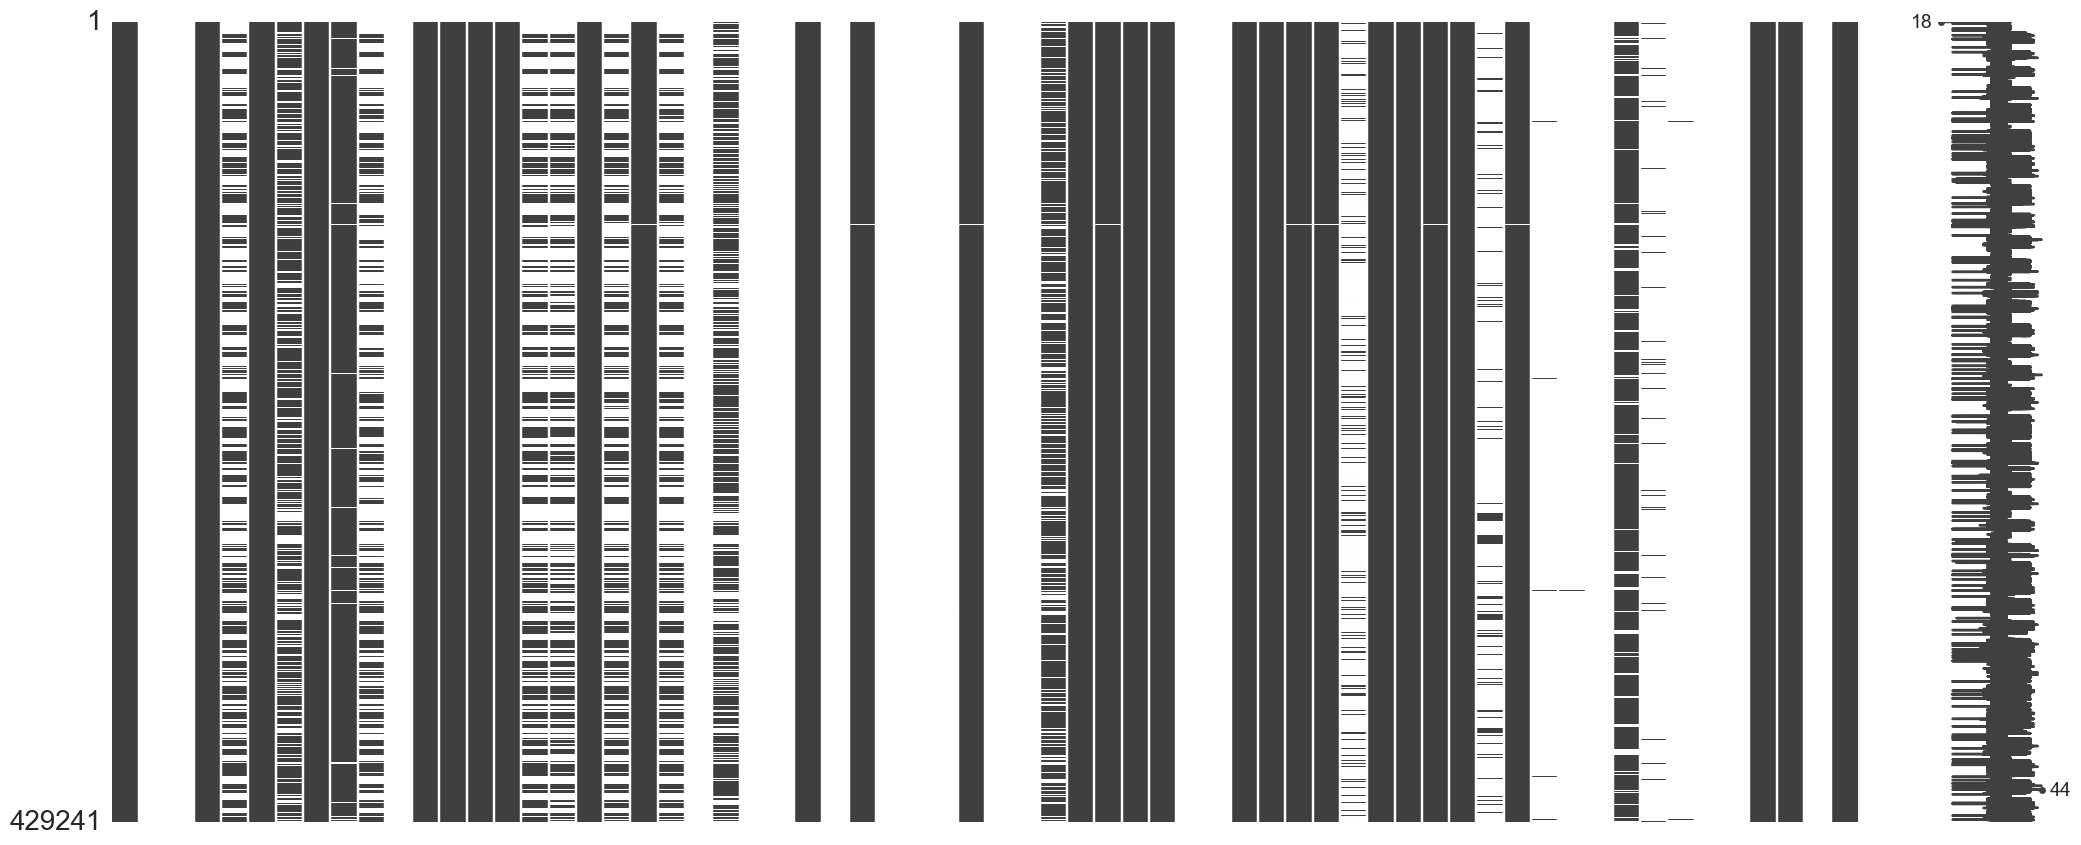

In [10]:
import missingno as msno

msno.matrix(hennepin)

**OK looks like some columns are barely populated. Let's remove them.**

In [9]:
def delete_near_null(df, cols, populated_threshold=0.01):
    """iterate through columns and remove columns with almost null columns"""
    for col in cols:
        # drop col if unique values is 1
        non_null_rows = df[col].count()
        total_rows = len(df[col])
        populated_ratio = non_null_rows/total_rows
        if populated_ratio <= populated_threshold:
            print('Columns Removed')
            del df[col]
            print(col)
    return df

In [10]:
column_list = list(hennepin.select_dtypes(include=['object']).columns.values)
column_list.remove('geometry')
hennepin = delete_near_null(hennepin, column_list)

# Filtering on Geodesic Features

In [11]:
# filter out points
hennepin = hennepin[hennepin['geometry'].geom_type != 'Point']

In [12]:
# filter to minneapolis
mpls = hennepin[hennepin['CITY'] == 'MINNEAPOLIS']

In [13]:
mpls.shape

(129860, 64)

# Geospatial Transformations

# Transforming Units of Measure

# Transforming Projections

# Geospatial Calculations

# Calculate Centroid

# Calculate Perimeter

# Calculate Distance between Points

# Joins / Merges

In [23]:
# # enough about taxes
# file = './data/shp_water_lakes_rivers.zip'

# z = zipfile.ZipFile(file)
# for name in z.namelist():
#     z.extract(name,"./data/")

NameError: name 'zipfile' is not defined

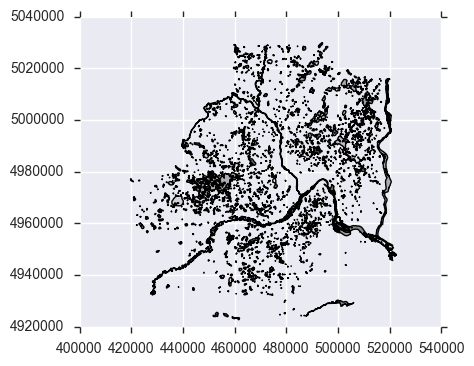

In [24]:
shp_file = './data/LakesAndRivers.dbf'

water_df = gpd.read_file(shp_file).set_index(['OWF_ID']).sort_index()
water_df.plot()

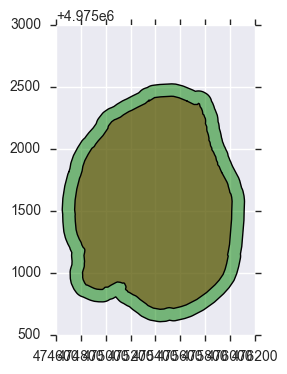

In [51]:
# lake calhoun
lake_calhoun = water_df[water_df.NAME_DNR == 'Calhoun']

# get the 100m surounding lake calhoun
buffered_lake_calhoun = lake_calhoun.buffer(100)
ax = lake_calhoun.plot(color='red');

buffered_lake_calhoun.plot(ax=ax, color='green');

In [52]:
# spatial joins are expensive
buffered_calhoun_poly = buffered_lake_calhoun.iloc[0]

In [53]:
# wow use rtree!
spatial_index = mpls.sindex
possible_matches_index = list(spatial_index.intersection(buffered_calhoun_poly.bounds))
possible_matches = mpls.iloc[possible_matches_index]
precise_matches = possible_matches[possible_matches.intersects(buffered_calhoun_poly)]

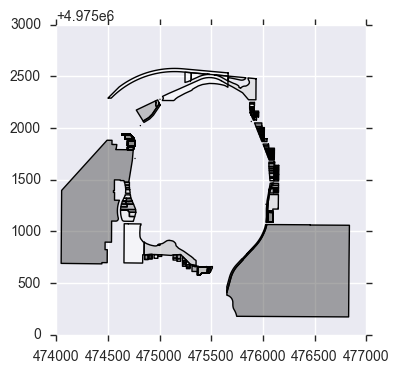

In [54]:
precise_matches.plot()

# Joining Tablular Data to Geospatial Data

# Joining Geospatial Data Sets Together

# Writing Data Out